<a href="https://colab.research.google.com/github/GitWahome/Machine-Learning/blob/master/Finance_Preidction_CS156.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACCESS THE COLAB: https://colab.research.google.com/drive/1-v9ctU-6pG0Ep1DJmMl-nz0tzGeRTtLb

I uploaded the data to github to allow me to work online:

I took the first 1500 of both the loan and reject data.

Given that the two datasets had not factor connecting them, and given that the prompt was to estimate the maximum amount of loan that can be given, it only made sense to run the model on the accepted loan applications. 

I did not see how we can combine the two into a single dataset and make use of the same model while non of the variables overlapped to facilitate mapping.

*   **Data dictionary:** https://github.com/GitWahome/Machine-Learning/blob/master/LCDataDictionary.xlsx
*   **Loan Data:**https://gist.githubusercontent.com/GitWahome/b65307f04e5365c5b92ce5d8974e70ab/raw/d95684e5a5e37b03838a09a7dd7eee3bff9220d3/loandata.csv

*   **Reject Data: ** https://gist.githubusercontent.com/GitWahome/e0b76c717bc8f421ca0f859fc038496f/raw/2bc91077fdf9c09c69142d8f8985dd1473f6a34d/MinRejectStats_2018Q2.csv




Variables included in the model:


For Loan Data

1.   loan_amnt
2.   int_rate
3.   installment





I used this to remove some depreciation warnings. I know it is not advisable, but I needed to make output less cluttered.

In [0]:
import warnings
warnings.filterwarnings("ignore")

Cleaning/Transformation performed on the data.


1.   Remove any empty values
2.   Transform all values to floats.
3.   Transform interest rates to float from percentage strings.



In [0]:
import pandas as pd 
#I used this to convert the installment rate to floats.
def p2f(x):
    return float(x.strip('%'))/100
loanAccept = pd.read_csv("https://gist.githubusercontent.com/GitWahome/b65307f04e5365c5b92ce5d8974e70ab/raw/d95684e5a5e37b03838a09a7dd7eee3bff9220d3/loandata.csv"
                        ,converters = {'int_rate':p2f})
loanAccept.columns = loanAccept.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Preview the first 5 lines of the loaded data 
loanAccept.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount
0,10000,10000,10000,36 months,0.2039,373.63,D,D4,Realtor,3 years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
1,20000,20000,20000,60 months,0.1306,455.68,C,C1,Business Analyst,6 years,...,NaN,NaN,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN
2,14000,14000,14000,60 months,0.1056,301.34,B,B3,Product Manager,8 years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
3,8000,8000,8000,36 months,0.0683,246.40,A,A3,City Attorney,2 years,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
4,22000,22000,22000,60 months,0.1747,552.34,D,D1,Laborer,10+ years,...,NaN,NaN,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN


In [0]:
#Select the rows we need from each dataframe
#Remove empty cells
loanAccept = loanAccept[['loan_amnt', 'int_rate', 'installment']].dropna()
#loanReject = loanReject[['amount_requested', 'debt-to-income_ratio', 'state']].dropna()
loanAccept.head()

,loan_amnt,int_rate,installment
0,10000,0.2039,373.63
1,20000,0.1306,455.68
2,14000,0.1056,301.34
3,8000,0.0683,246.40
4,22000,0.1747,552.34


Meta data:

**Training method used**

I used A  Linear regression on the accepted Loans with the Y as the loan amount and the data being the rest of the variables like  interest rate and installment amount.

**Techniques used to avoid overfitting**

I applied K fold cross validation with 2 folds.

**Model Used**

Multiple Linear Regression.

**Model performance**

The plain model had an accuracy of about 90% but after CV, this became lower with a mean of about 89.5% but it showed higher scores within the set of scores than the normal Linear regressions in some instances.



*I will be honest, I suspect there could be a mistake in this step but I ran out of penalties trying to fix it.*


In [0]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X = loanAccept[['int_rate', 'installment']]
y = list(loanAccept["loan_amnt"])
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 10-fold cross-validation with logistic regression
from sklearn import linear_model, metrics
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print("This is the amount of variance explained by our Linear Model \n",
      metrics.explained_variance_score(y_test, predictions))
print("This is the Accuracy score of our Linear Model \n",
      metrics.explained_variance_score(y_test, predictions))

print("These are the model Coefficients \n", model.coef_)

This is the amount of variance explained by our Linear Model 
 0.889954255201309
This is the Accuracy score of our Linear Model 
 0.889954255201309
These are the model Coefficients 
 [-4760.70779465    34.68047751]


Fit Linear Regression

In [0]:
from sklearn import metrics
import numpy as np
finX = []
for i in range(len(loanAccept["loan_amnt"])):
  finX.append([float(list(loanAccept["int_rate"])[i]),list(loanAccept["installment"])[i]])
X = np.array(finX)
y = np.array(list(loanAccept["loan_amnt"]))
print("THIS IS OUR ACCEPTED LOAN DATA \n",X)

THIS IS OUR ACCEPTED LOAN DATA 
 [[2.03900e-01 3.73630e+02]
 [1.30600e-01 4.55680e+02]
 [1.05600e-01 3.01340e+02]
 ...
 [8.08000e-02 7.84340e+02]
 [1.64600e-01 3.53850e+02]
 [1.45200e-01 1.20508e+03]]


Text(0,0.5,'Predicted Loan Amount')

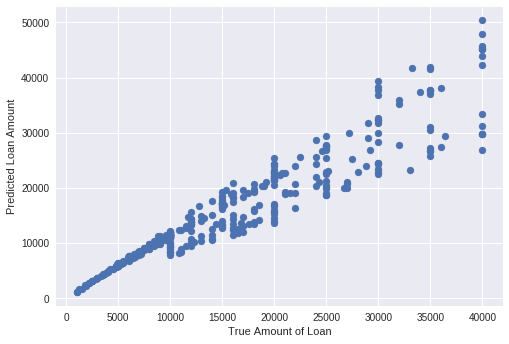

In [0]:
#This is a plot of the test values vs predicted values
## The line / model
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("True Amount of Loan")
plt.ylabel("Predicted Loan Amount")

K FOLD cross validation with 2 folds.

In [0]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)
  

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [0]:
# Necessary imports:
#Perform 6 fold cross validation
from sklearn.cross_validation import cross_val_score, cross_val_predict
# Perform 6-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=6)
print("Cross-validated scores:", scores)
print("Mean cross validated score", np.mean(scores))

Cross-validated scores: [0.9044551  0.89928687 0.89165613 0.88812172 0.88693145 0.91035287]
Mean cross validated score 0.8968006891248427


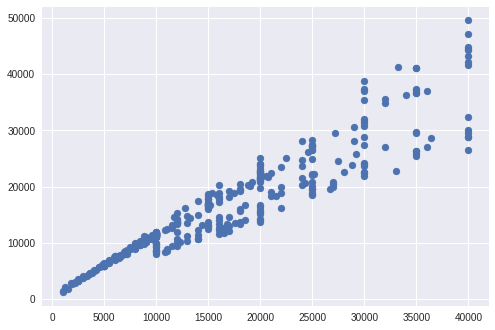

In [0]:
#Now make cross validated predictions
predictionsCV = cross_val_predict(model, X_test, y_test, cv=6)
plt.scatter(y_test, predictionsCV)

In [0]:
accuracy = metrics.r2_score(y_test, predictionsCV)
print("Cross-Predicted Accuracy:", accuracy)
print("This is the amount of variance explained by our Cross Validated Linear Model \n",
      metrics.explained_variance_score(y_test, predictionsCV))

Cross-Predicted Accuracy: 0.8880479488414283
This is the amount of variance explained by our Cross Validated Linear Model 
 0.8880483026474542
